# importer les librairies

In [9]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
%matplotlib inline

In [32]:
target_width = 50
target_height = 50
target_size = (target_width, target_height)
classes = ['dog', 'cat']
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test1'

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=target_size, classes=classes,  batch_size=20)

Found 24400 images belonging to 2 classes.


# Construire le reseaux de neurone

In [ ]:
model = Sequential()

model.add( Conv2D(32, (3, 3), activation='relu', input_shape=(50,50,3)) )
model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2,2)) )

model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dense(2, activation='softmax') )

model.compile(Adam(lr=0.00003), loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = 500
epochs = 40
model.fit_generator(train_batches, steps_per_epoch=steps_per_epoch, epochs=epochs)

Epoch 1/40
500/500 [==============================] - 29s 58ms/step - loss: 4.0838 - acc: 0.5804
Epoch 2/40
500/500 [==============================] - 28s 57ms/step - loss: 2.0350 - acc: 0.5989
Epoch 3/40
500/500 [==============================] - 29s 57ms/step - loss: 1.3366 - acc: 0.6184
Epoch 4/40
500/500 [==============================] - 28s 55ms/step - loss: 1.0516 - acc: 0.6310
Epoch 5/40
500/500 [==============================] - 28s 57ms/step - loss: 0.9034 - acc: 0.6396
Epoch 6/40
500/500 [==============================] - 29s 57ms/step - loss: 0.7829 - acc: 0.6599
Epoch 7/40
500/500 [==============================] - 29s 57ms/step - loss: 0.7256 - acc: 0.6666
Epoch 8/40
500/500 [==============================] - 29s 58ms/step - loss: 0.6596 - acc: 0.6935
Epoch 9/40
500/500 [==============================] - 28s 56ms/step - loss: 0.6406 - acc: 0.6968
Epoch 10/40
500/500 [==============================] - 28s 57ms/step - loss: 0.6037 - acc: 0.7087
Epoch 11/40
500/500 [========

# Tester le code

In [37]:
def probability_to_percentage(p):
    return round(p*100, 2)

def parse_prediction_array(prediction):
    max_index = prediction[0].argmax()
    if max_index == 0:
        return {"label": "chien", "p": probability_to_percentage(prediction[0][max_index])}
    else:
         return {"label": "chat", "p": probability_to_percentage(prediction[0][max_index])}

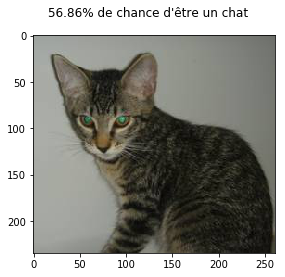

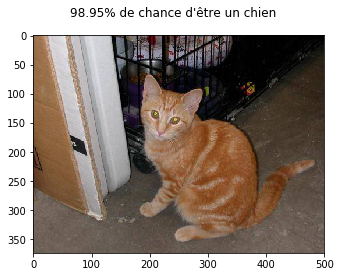

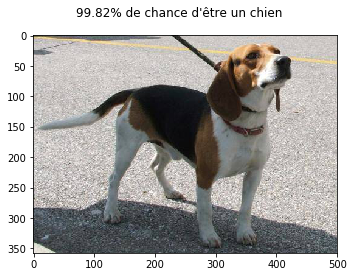

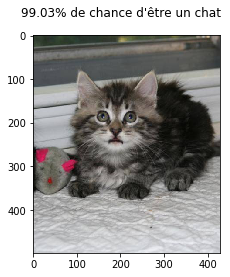

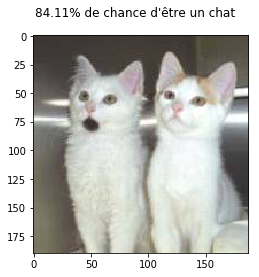

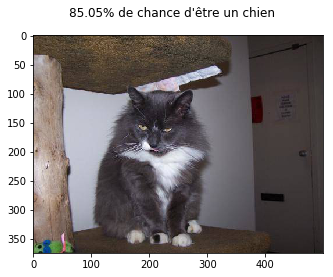

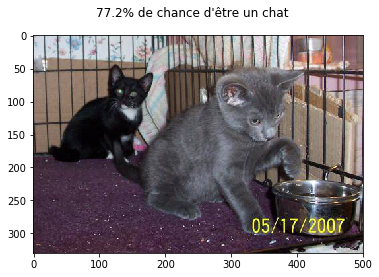

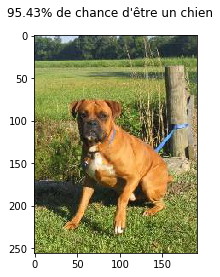

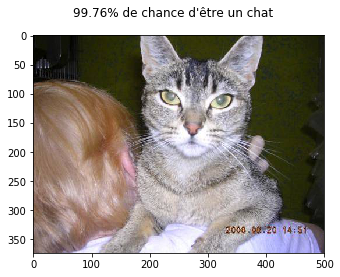

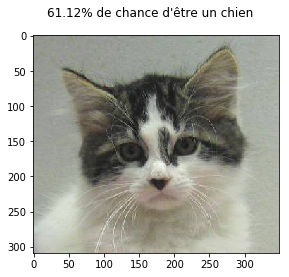

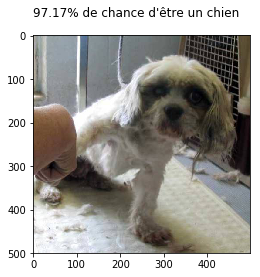

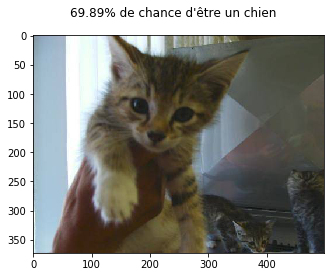

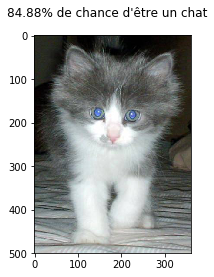

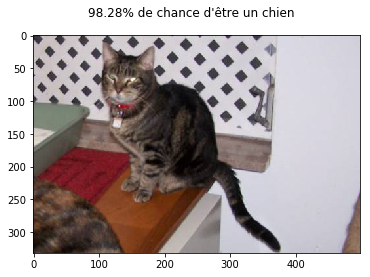

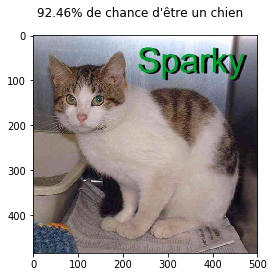

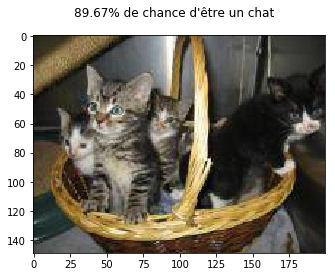

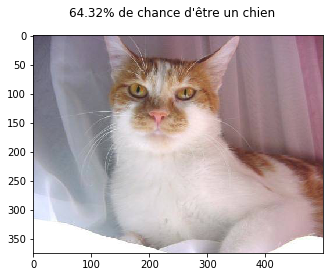

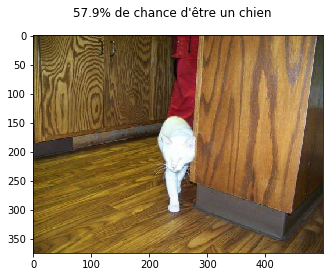

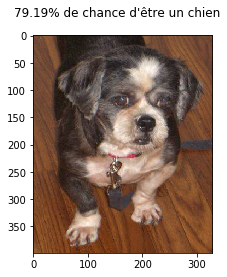

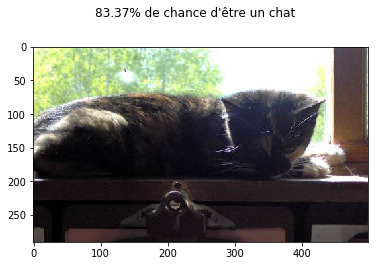

In [41]:
for _ in range(20):
    
    rand_nb = random.randint(1, 12500)
    img_src = 'data/test1/'+ str(rand_nb) +'.jpg'
    img =  cv2.imread(img_src)

    img = cv2.resize(img, target_size)
    img = img.reshape(1, target_width,target_height,3)
    prediction = model.predict(img)

    parsed_res = parse_prediction_array(prediction)

    fig, ax = plt.subplots()
    title =  str(parsed_res["p"]) + "% de chance d'être un " + str(parsed_res["label"])
    fig.suptitle(title, fontsize=12)

    np_img = mpimg.imread(img_src)
    plt.imshow(np_img)